In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

In [2]:
semi_good_train = pd.read_csv('/content/drive/MyDrive/hana1/project1/data/df_semi_good_train.csv', index_col=0)
semi_poor_train = pd.read_csv('/content/drive/MyDrive/hana1/project1/data/df_semi_poor_train.csv', index_col=0)
standard = pd.read_csv('/content/drive/MyDrive/hana1/project1/data/standard_train_good_poor.csv', index_col=0)

In [ ]:
semi_good_train

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Cluster
22,7,34.0,4,143162.64,12187.220000,1.0,5.0,8.0,3.0,8.0,...,1,1303.01,38.068624,219.0,0,246.992319,263.174163,2,968.555517,1
23,8,34.0,4,143162.64,12187.220000,1.0,5.0,8.0,3.0,8.0,...,1,1303.01,38.374753,220.0,0,246.992319,10000.000000,2,895.494583,1
68,5,23.0,3,114838.41,9843.867500,2.0,5.0,7.0,3.0,11.0,...,1,1377.74,29.819187,260.0,0,226.892792,649.809364,2,367.684594,1
71,8,24.0,3,114838.41,9843.867500,2.0,5.0,7.0,3.0,11.0,...,1,1377.74,27.813354,263.0,0,226.892792,254.571767,0,742.922191,1
88,1,32.0,4,88640.24,7266.686667,3.0,6.0,1.0,2.0,-1.0,...,1,950.36,28.210617,305.0,0,135.173371,98.931764,0,732.563532,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99904,1,39.0,14,87695.34,7337.945000,2.0,7.0,7.0,0.0,5.0,...,1,361.68,43.307916,229.0,0,0.000000,98.884010,0,874.910490,1
99906,3,39.0,14,87695.34,7337.945000,2.0,7.0,7.0,0.0,5.0,...,1,361.68,36.982569,231.0,0,0.000000,150.508824,0,823.285676,1
99907,4,39.0,14,87695.34,7337.945000,2.0,7.0,7.0,0.0,5.0,...,1,361.68,26.745973,232.0,0,0.000000,154.229428,0,819.565072,1
99909,6,39.0,14,87695.34,7337.945000,2.0,7.0,7.0,0.0,5.0,...,1,361.68,34.561012,234.0,0,0.000000,119.328999,1,864.465501,1


In [ ]:
standard['Cluster'].value_counts()

0    18391
1     9559
Name: Cluster, dtype: int64

In [3]:
num_standard = standard.drop(['Month','Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour'], axis =1)

In [4]:
category_standard = standard.drop(['Age' ,'Annual_Income' ,'Monthly_Inhand_Salary' ,'Num_Bank_Accounts' ,'Num_Credit_Card' ,'Interest_Rate' ,'Num_of_Loan','Delay_from_due_date' ,'Num_of_Delayed_Payment' ,'Changed_Credit_Limit' ,'Num_Credit_Inquiries' ,'Outstanding_Debt' ,'Credit_Utilization_Ratio' ,'Credit_History_Age' ,'Total_EMI_per_month' ,'Amount_invested_monthly' ,'Monthly_Balance' ], axis =1)

In [5]:
category_standard

,Month,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Cluster
7,8,12,1,0,1,0
8,1,13,1,0,5,0
22,7,4,1,0,2,1
23,8,4,1,0,2,1
24,1,5,1,0,3,0
...,...,...,...,...,...,...
99949,6,10,1,0,1,0
99951,8,10,1,0,3,0
99989,6,1,0,1,0,0
99990,7,1,0,1,3,0


In [6]:
num_standard

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Cluster
7,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,6.0,11.27,4.0,809.98,23.933795,270.0,49.574949,24.785217,358.124168,0
8,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,4.0,5.42,2.0,605.03,24.464031,319.0,18.816215,104.291825,470.690627,0
22,34.0,143162.64,12187.220000,1.0,5.0,8.0,3.0,8.0,6.0,7.10,3.0,1303.01,38.068624,219.0,246.992319,263.174163,968.555517,1
23,34.0,143162.64,12187.220000,1.0,5.0,8.0,3.0,8.0,6.0,7.10,3.0,1303.01,38.374753,220.0,246.992319,10000.000000,895.494583,1
24,54.0,30689.89,2612.490833,2.0,5.0,4.0,1.0,0.0,6.0,1.99,4.0,632.46,26.544229,207.0,16.415452,81.228859,433.604773,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99949,33.0,59146.36,4908.863333,3.0,6.0,6.0,1.0,6.0,6.0,6.68,5.0,418.03,24.975531,246.0,26.778419,91.321664,622.786250,0
99951,33.0,59146.36,4908.863333,3.0,6.0,6.0,1.0,8.0,6.0,6.68,5.0,418.03,27.682186,248.0,26.778419,10000.000000,389.488483,0
99989,28.0,20002.88,1929.906667,10.0,8.0,29.0,5.0,33.0,25.0,16.31,9.0,3571.70,33.359987,73.0,60.964772,74.366603,307.659291,0
99990,28.0,20002.88,1929.906667,10.0,8.0,29.0,5.0,33.0,26.0,18.31,9.0,3571.70,25.123535,70.0,60.964772,173.275503,228.750392,0


In [ ]:
semi_poor_train

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Cluster
7,8,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1,809.98,23.933795,270.0,0,49.574949,24.785217,1,358.124168,0
8,1,28.0,13,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,...,1,605.03,24.464031,319.0,0,18.816215,104.291825,5,470.690627,0
24,1,54.0,5,30689.89,2612.490833,2.0,5.0,4.0,1.0,0.0,...,1,632.46,26.544229,207.0,0,16.415452,81.228859,3,433.604773,0
25,2,54.0,5,30689.89,2612.490833,2.0,5.0,4.0,1.0,5.0,...,1,632.46,35.279982,208.0,0,16.415452,124.881820,5,409.951812,0
26,3,55.0,5,30689.89,2612.490833,2.0,5.0,4.0,1.0,3.0,...,1,632.46,32.301163,209.0,0,16.415452,83.406509,1,411.427123,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99949,6,33.0,10,59146.36,4908.863333,3.0,6.0,6.0,1.0,6.0,...,1,418.03,24.975531,246.0,0,26.778419,91.321664,1,622.786250,0
99951,8,33.0,10,59146.36,4908.863333,3.0,6.0,6.0,1.0,8.0,...,1,418.03,27.682186,248.0,0,26.778419,10000.000000,3,389.488483,0
99989,6,28.0,1,20002.88,1929.906667,10.0,8.0,29.0,5.0,33.0,...,0,3571.70,33.359987,73.0,1,60.964772,74.366603,0,307.659291,0
99990,7,28.0,1,20002.88,1929.906667,10.0,8.0,29.0,5.0,33.0,...,0,3571.70,25.123535,70.0,1,60.964772,173.275503,3,228.750392,0


In [ ]:
semi_poor_train.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Cluster'],
      dtype='object')

In [ ]:
semi_good_train.dtypes

Month                         int64
Age                         float64
Occupation                    int64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                    int64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount         int64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour             int64
Monthly_Balance             float64
Cluster                       int64
dtype: object

# anova 분석 - 수치형

In [11]:
# 클러스터(또는 그룹) 간에 유의미한 차이가 없다는 가설
import pandas as pd
import scipy.stats as stats

# 수치형
data = num_standard

# Define the continuous variables
continuous_variables = ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
                        'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

anova_results = []


for cont_variable in continuous_variables:
    # Group data by 'Cluster'
    grouped_data = data.groupby('Cluster')[cont_variable]

    # Perform ANOVA
    f_statistic, p_value = f_oneway(*[group for _, group in grouped_data])

    alpha = 0.05

    if p_value < alpha:
        result = 'H0 Reject'
    else:
        result = 'H1 Reject'

    anova_results.append({'Variable': cont_variable, 'F-statistic': f_statistic, 'P-value': p_value, 'Result' : result})

# Create a DataFrame from the list of ANOVA results
anova_results_df = pd.DataFrame(anova_results)

# Print the ANOVA results
print(anova_results_df)


                    Variable   F-statistic        P-value     Result
0              Annual_Income  84025.590715   0.000000e+00  H0 Reject
1      Monthly_Inhand_Salary  82864.469767   0.000000e+00  H0 Reject
2          Num_Bank_Accounts    309.894462   5.431884e-69  H0 Reject
3            Num_Credit_Card    196.144344   2.048999e-44  H0 Reject
4              Interest_Rate    490.184668  1.096689e-107  H0 Reject
5                Num_of_Loan    910.711002  6.669474e-197  H0 Reject
6        Delay_from_due_date    360.539348   6.848673e-80  H0 Reject
7     Num_of_Delayed_Payment      3.128191   7.695998e-02  H1 Reject
8       Changed_Credit_Limit    253.744469   7.058641e-57  H0 Reject
9       Num_Credit_Inquiries      1.454272   2.278539e-01  H1 Reject
10          Outstanding_Debt    632.813077  4.211789e-138  H0 Reject
11  Credit_Utilization_Ratio    520.475104  3.687025e-114  H0 Reject
12        Credit_History_Age    678.968952  6.558025e-148  H0 Reject
13       Total_EMI_per_month   686

# 카이제곱 - 범주형

In [ ]:
category_standard

,Month,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Cluster
7,8,12,1,0,1,0
8,1,13,1,0,5,0
22,7,4,1,0,2,1
23,8,4,1,0,2,1
24,1,5,1,0,3,0
...,...,...,...,...,...,...
99949,6,10,1,0,1,0
99951,8,10,1,0,3,0
99989,6,1,0,1,0,0
99990,7,1,0,1,3,0


In [12]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load your data
data = category_standard

# Define the list of categorical variables and dependent variable
categorical_variables = ['Month','Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
dependent_variable = 'Cluster'

# Create an empty list to store results
results = []
alpha = 0.05

# Loop through each categorical variable
for cat_variable in categorical_variables:
    # Create a contingency table
    contingency_table = pd.crosstab(data[cat_variable], data[dependent_variable])

    # Perform chi-square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    if p_value < alpha:
      result = 'H0 Reject'
    else:
      result = 'H1 Reject'

    # Append results to the list
    results.append({
        'Variable': cat_variable,
        'Chi-square statistic': chi2_stat,
        'P-value': p_value,
        'Result': result
    })

# Create a data frame from the results list
results_df = pd.DataFrame(results)

# Print the results data frame
print(results_df)

                Variable  Chi-square statistic        P-value     Result
0                  Month              6.470643   4.859897e-01  H1 Reject
1             Occupation             31.808639   4.264588e-03  H0 Reject
2             Credit_Mix            815.555269  8.024600e-178  H0 Reject
3  Payment_of_Min_Amount            307.178060   8.994444e-69  H0 Reject
4      Payment_Behaviour           2678.952086   0.000000e+00  H0 Reject


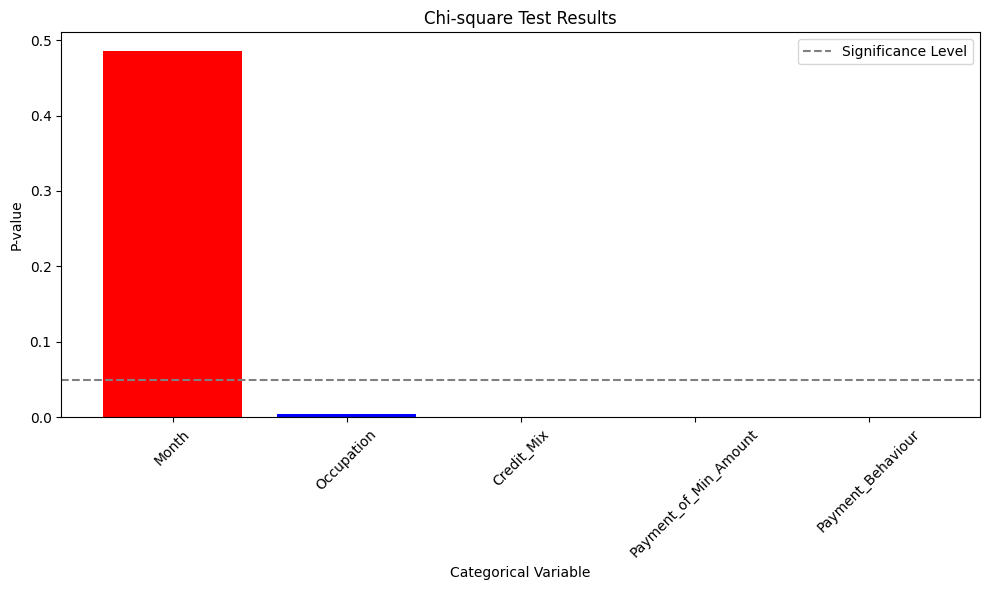

In [13]:
import matplotlib.pyplot as plt

# Create a bar plot of the results
plt.figure(figsize=(10, 6))
plt.bar(results_df['Variable'], results_df['P-value'], color=['blue' if r == 'H0 Reject' else 'red' for r in results_df['Result']])
plt.title('Chi-square Test Results')
plt.xlabel('Categorical Variable')
plt.ylabel('P-value')
plt.xticks(rotation=45)
plt.axhline(y=alpha, color='gray', linestyle='--', label='Significance Level')
plt.legend()
plt.tight_layout()
plt.show()

Variable: Month
Chi-square statistic: 6.4706434697
P-value: 0.4859896877
Result: Fail to reject the null hypothesis (no significant difference)


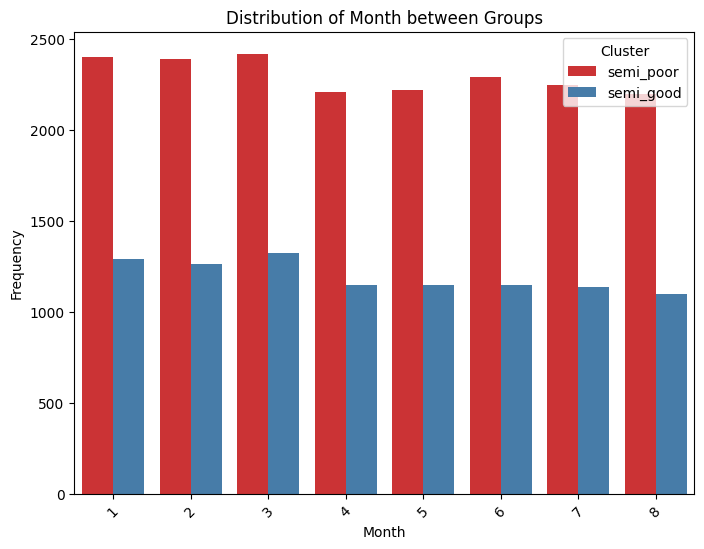

Variable: Occupation
Chi-square statistic: 31.8086391546
P-value: 0.0042645879
Result: Reject the null hypothesis (significant difference)


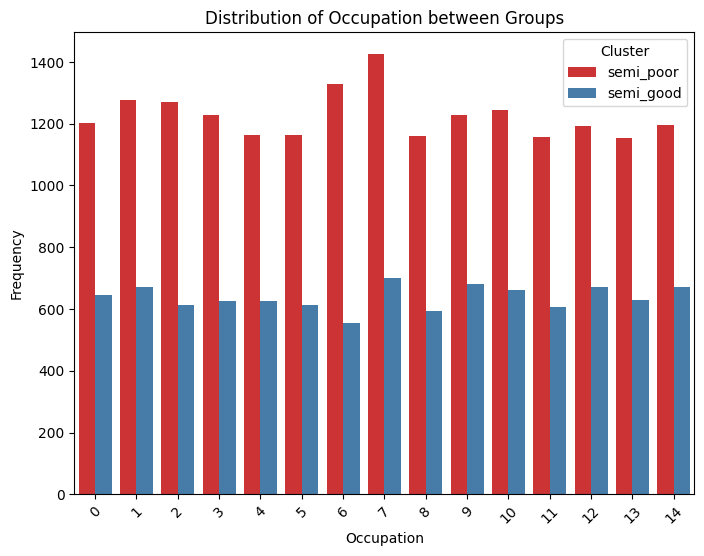

Variable: Credit_Mix
Chi-square statistic: 815.5552693442
P-value: 0.0000000000
Result: Reject the null hypothesis (significant difference)


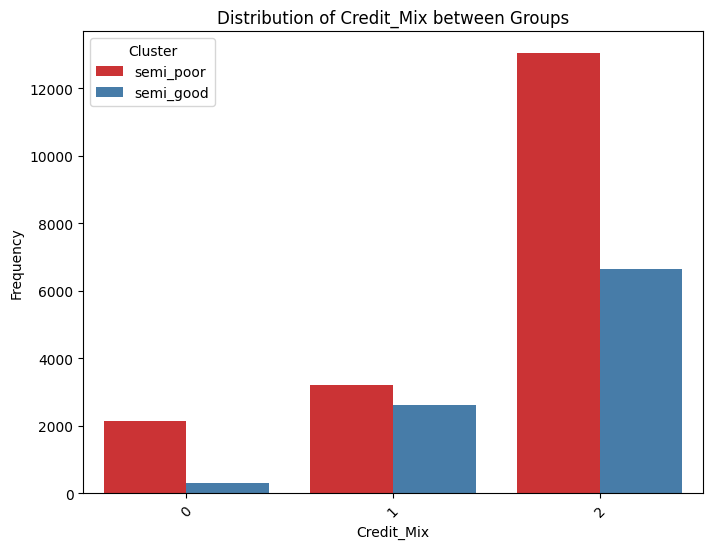

Variable: Payment_of_Min_Amount
Chi-square statistic: 307.1780596670
P-value: 0.0000000000
Result: Reject the null hypothesis (significant difference)


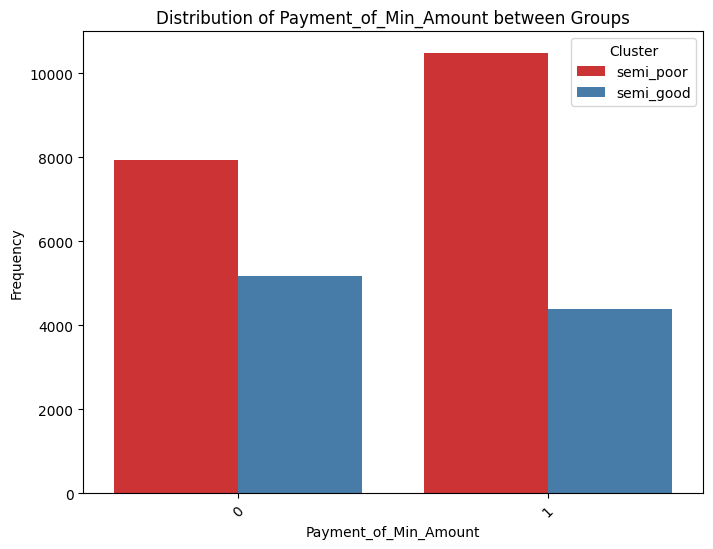

Variable: Payment_Behaviour
Chi-square statistic: 2678.9520855603
P-value: 0.0000000000
Result: Reject the null hypothesis (significant difference)


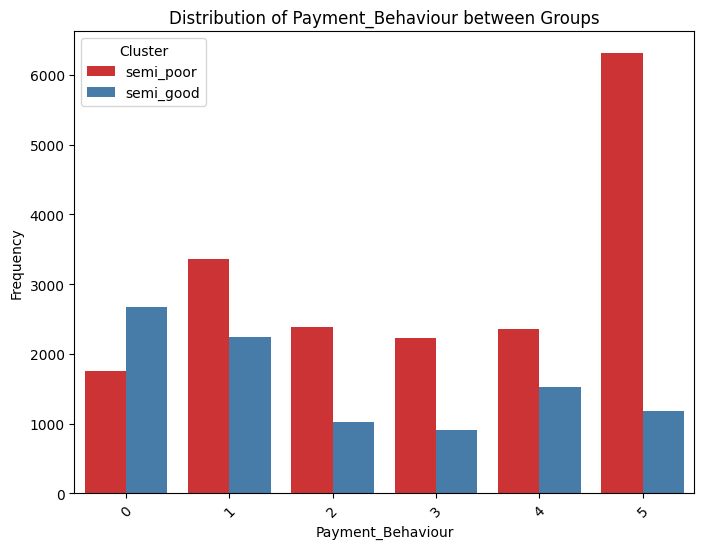

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Load your data
data = category_standard

# Define the dependent variable
dependent_variable = 'Cluster'

# List of categorical variables
categorical_variables = ['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

alpha = 0.05

# Loop through each categorical variable
for categorical_variable in categorical_variables:
    # Create a contingency table
    contingency_table = pd.crosstab(data[categorical_variable], data[dependent_variable])

    # Perform chi-square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    print(f"Variable: {categorical_variable}")
    print(f"Chi-square statistic: {chi2_stat:.10f}")
    print(f"P-value: {p_value:.10f}")

    if p_value < alpha:
        print("Result: Reject the null hypothesis (significant difference)")
    else:
        print("Result: Fail to reject the null hypothesis (no significant difference)")

    # Create a bar plot
    plt.figure(figsize=(8, 6))
    sns.set_palette("Set1")  # You can set a color palette if you'd like
    legend_labels = {1: 'semi_good', 0: 'semi_poor'}  # Custom legend labels
    sns.countplot(x=categorical_variable, hue='Cluster', data=data)
    plt.title(f'Distribution of {categorical_variable} between Groups')
    plt.xlabel(categorical_variable)
    plt.ylabel('Frequency')
    plt.legend(title='Cluster', labels=[legend_labels[val] for val in data['Cluster'].unique()])
    plt.xticks(rotation=45)
    plt.show()

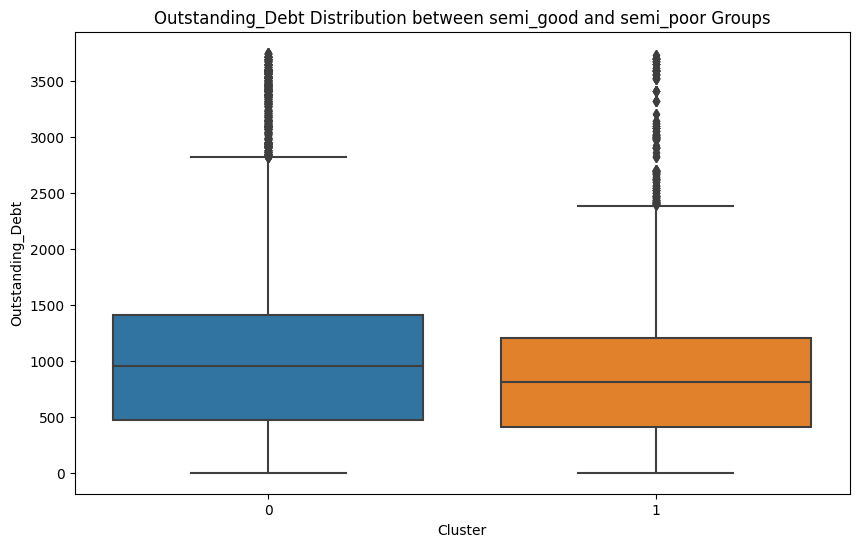

Variable: Outstanding_Debt
T-statistic: -25.1558
P-value: 0.0000000000
Result: Reject the null hypothesis (significant difference)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Select the variable you want to analyze
selected_variable = 'Outstanding_Debt'

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y=selected_variable, data=pd.concat([semi_good_train[[selected_variable, 'Cluster']], semi_poor_train[[selected_variable, 'Cluster']]]))
plt.title(f'{selected_variable} Distribution between semi_good and semi_poor Groups')
plt.show()

# Statistical Analysis
semi_good_values = semi_good_train[selected_variable]
semi_poor_values = semi_poor_train[selected_variable]

t_statistic, p_value = ttest_ind(semi_good_values, semi_poor_values, equal_var = True)
alpha = 0.05

print(f"Variable: {selected_variable}")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.10f}")

if p_value < alpha:
    print("Result: Reject the null hypothesis (significant difference)")
else:
    print("Result: Fail to reject the null hypothesis (no significant difference)")

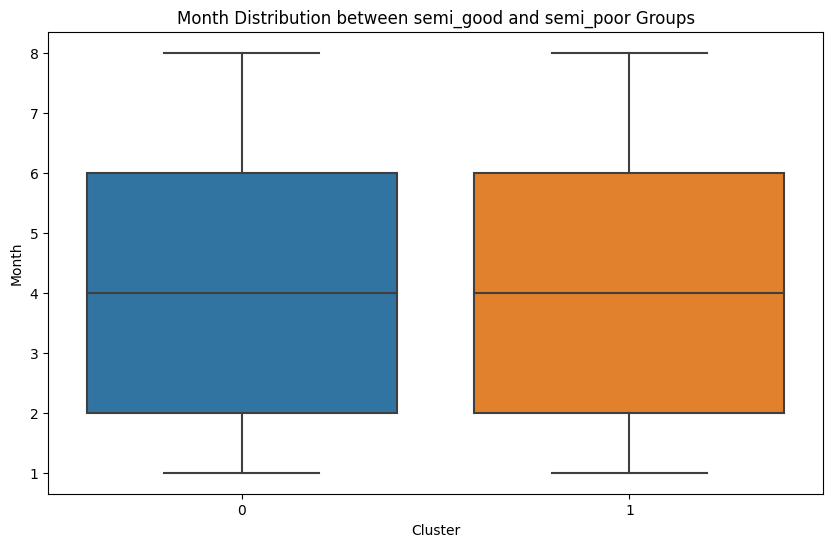

Variable: Month
T-statistic: -2.2032
P-value: 0.02759
Result: Reject the null hypothesis (significant difference)



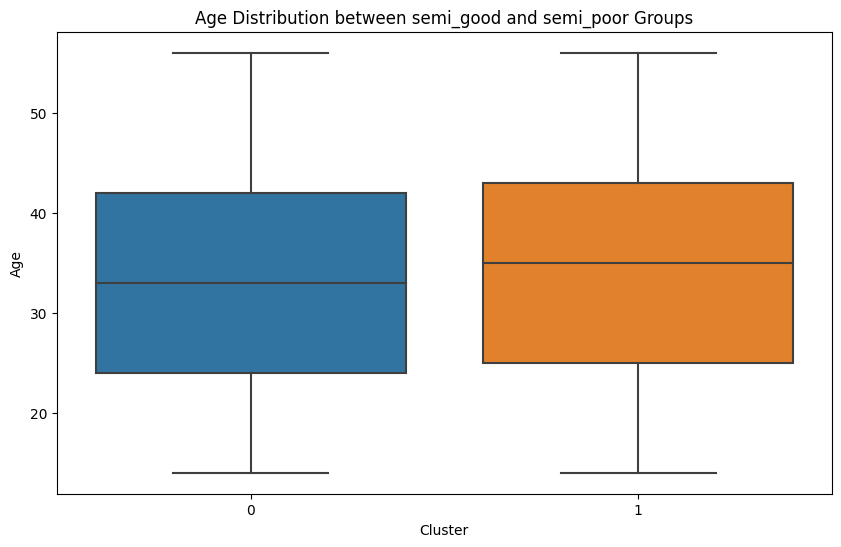

Variable: Age
T-statistic: 8.8410
P-value: 0.00000
Result: Reject the null hypothesis (significant difference)



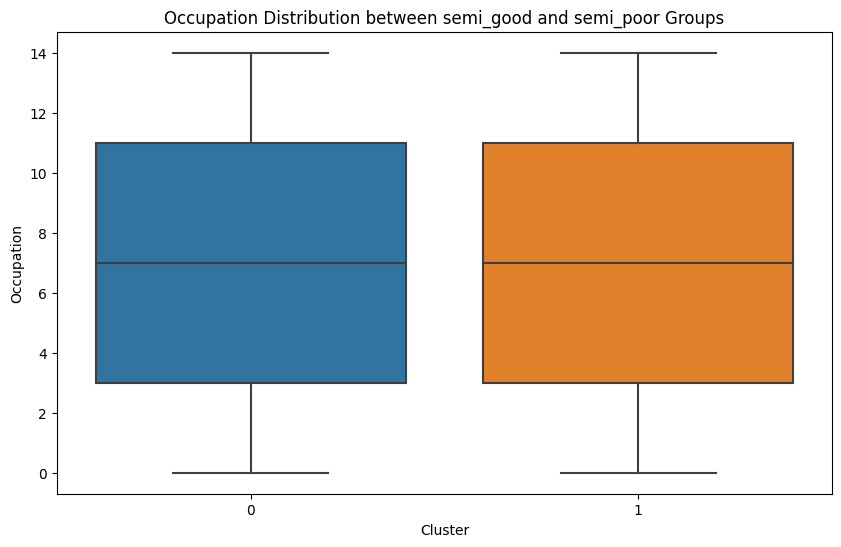

Variable: Occupation
T-statistic: 2.0597
P-value: 0.03944
Result: Reject the null hypothesis (significant difference)



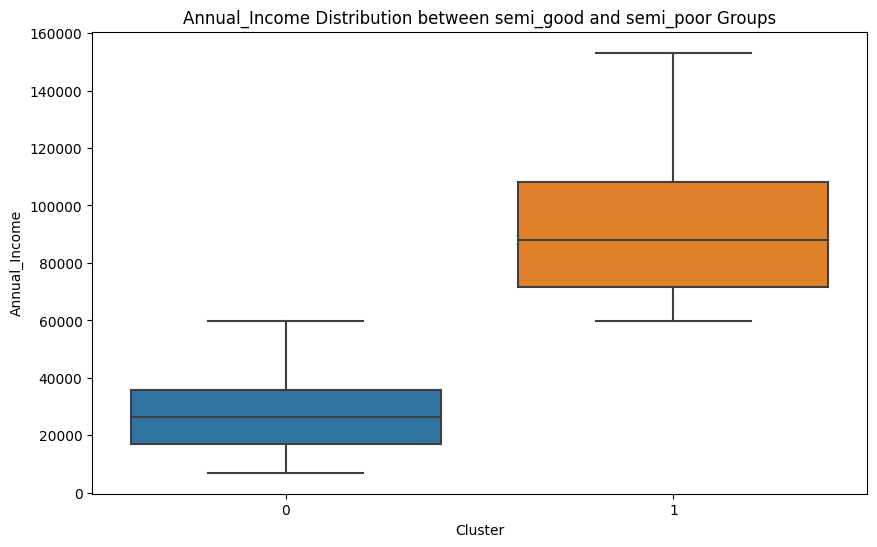

Variable: Annual_Income
T-statistic: 289.8717
P-value: 0.00000
Result: Reject the null hypothesis (significant difference)



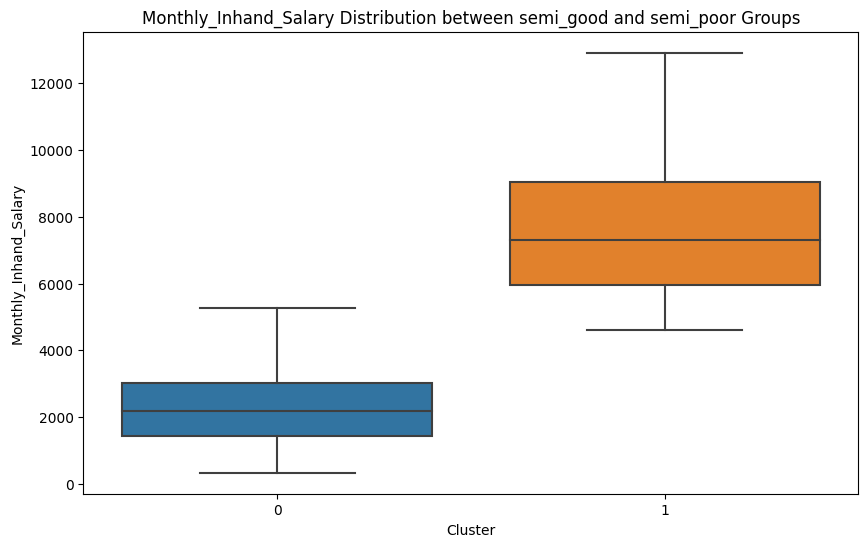

Variable: Monthly_Inhand_Salary
T-statistic: 287.8619
P-value: 0.00000
Result: Reject the null hypothesis (significant difference)



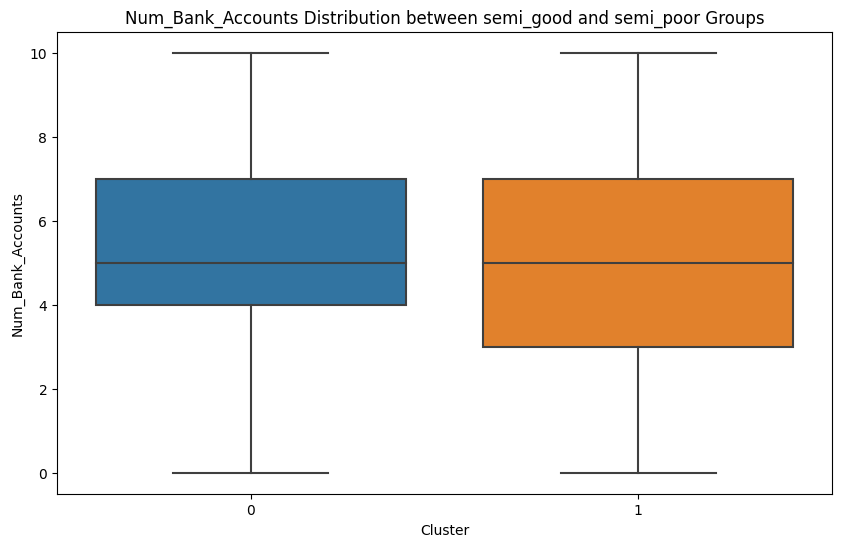

Variable: Num_Bank_Accounts
T-statistic: -17.6038
P-value: 0.00000
Result: Reject the null hypothesis (significant difference)



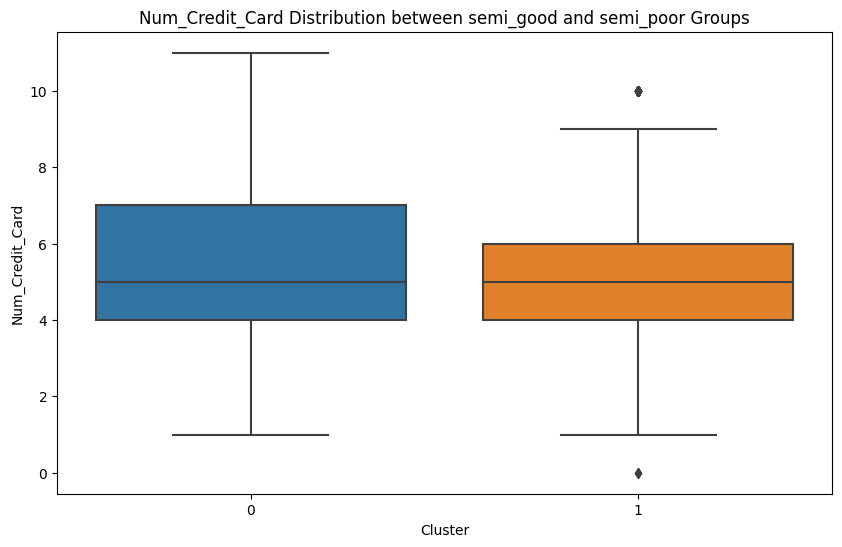

Variable: Num_Credit_Card
T-statistic: -14.0052
P-value: 0.00000
Result: Reject the null hypothesis (significant difference)



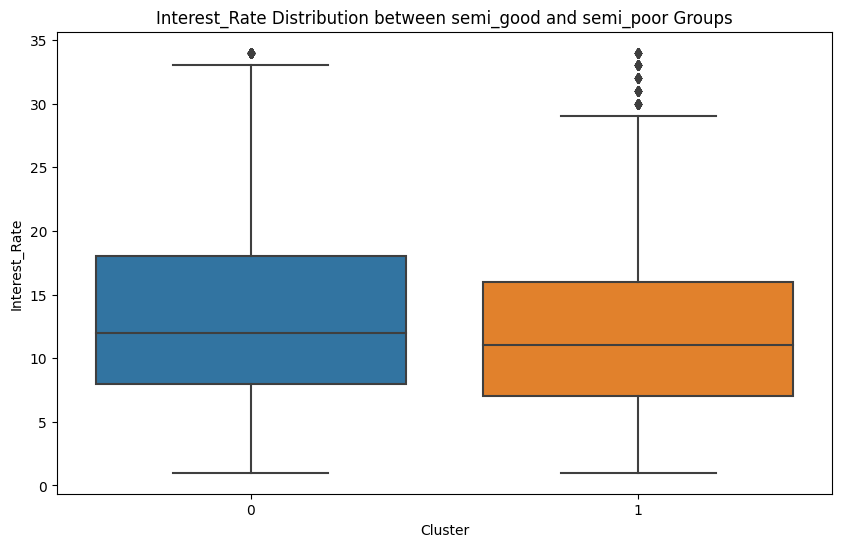

Variable: Interest_Rate
T-statistic: -22.1401
P-value: 0.00000
Result: Reject the null hypothesis (significant difference)



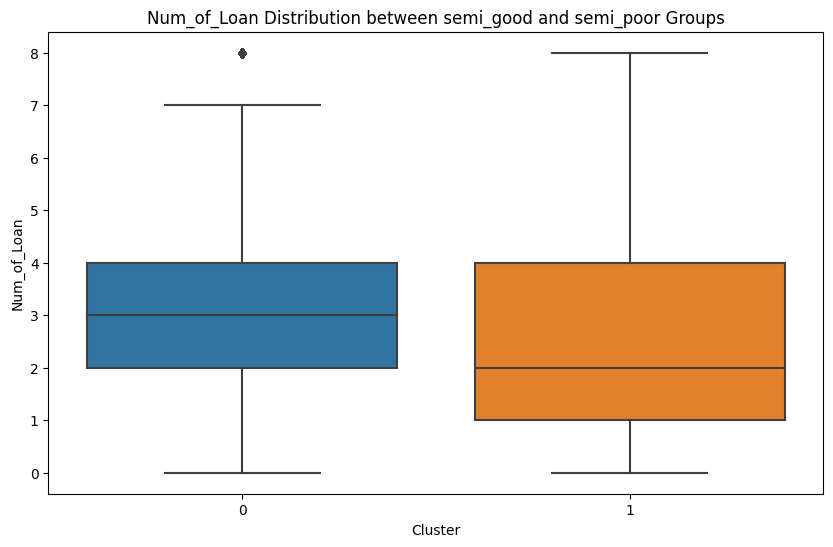

Variable: Num_of_Loan
T-statistic: -30.1780
P-value: 0.00000
Result: Reject the null hypothesis (significant difference)



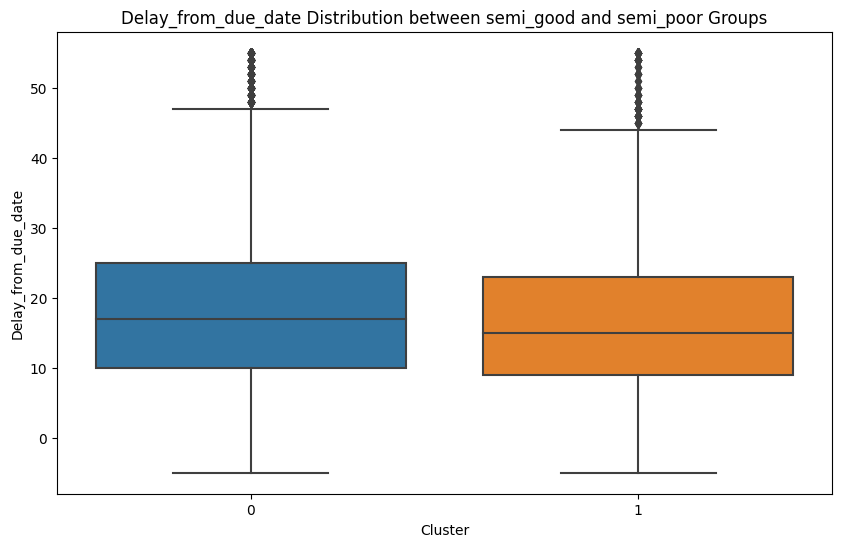

Variable: Delay_from_due_date
T-statistic: -18.9879
P-value: 0.00000
Result: Reject the null hypothesis (significant difference)



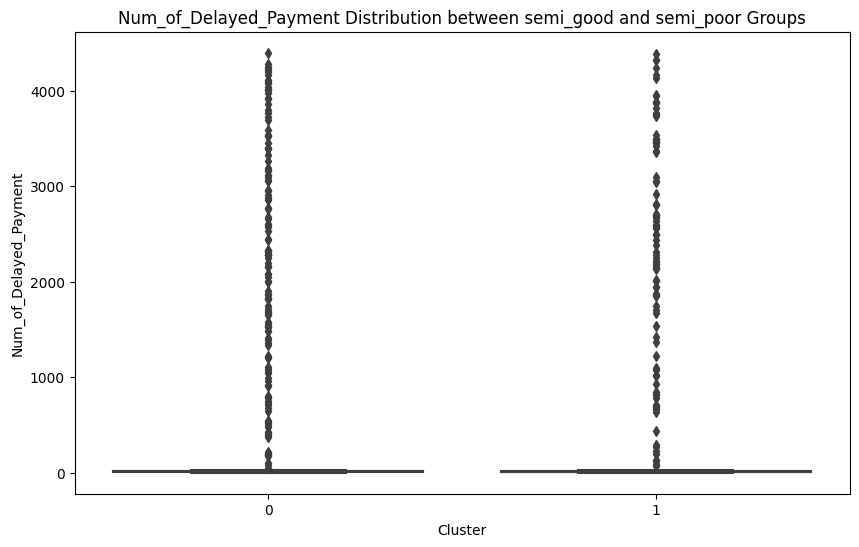

Variable: Num_of_Delayed_Payment
T-statistic: 1.7687
P-value: 0.07696
Result: Fail to reject the null hypothesis (no significant difference)



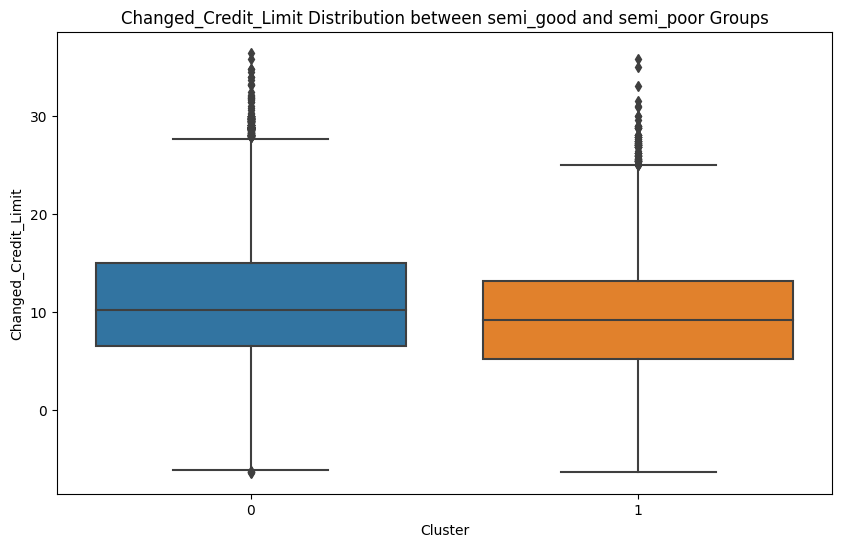

Variable: Changed_Credit_Limit
T-statistic: -15.9294
P-value: 0.00000
Result: Reject the null hypothesis (significant difference)



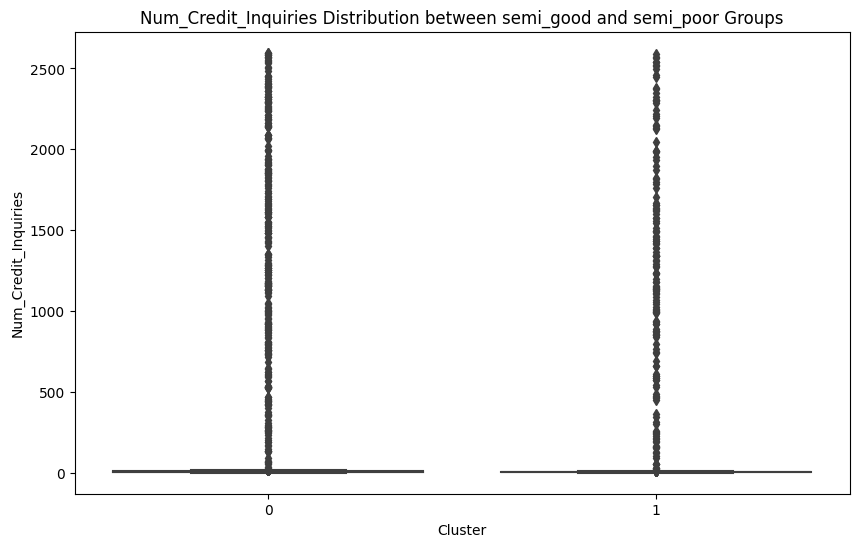

Variable: Num_Credit_Inquiries
T-statistic: -1.2059
P-value: 0.22785
Result: Fail to reject the null hypothesis (no significant difference)



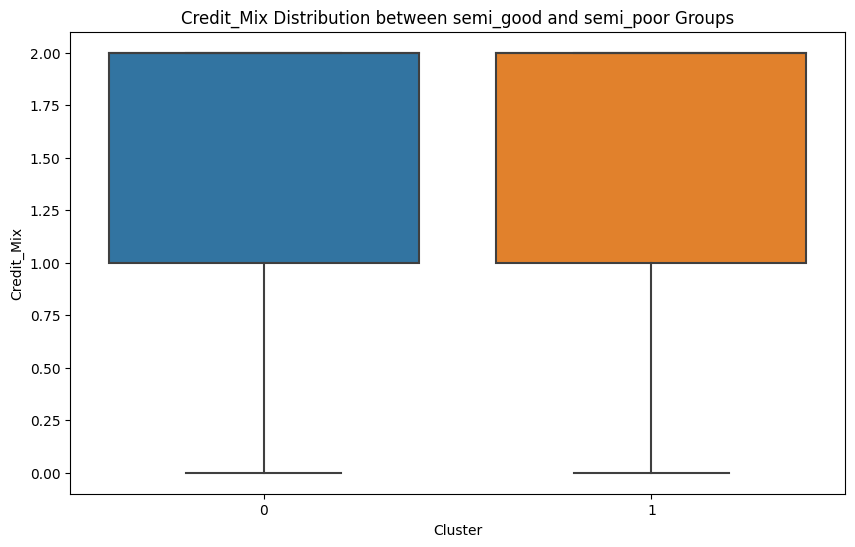

Variable: Credit_Mix
T-statistic: 9.1201
P-value: 0.00000
Result: Reject the null hypothesis (significant difference)



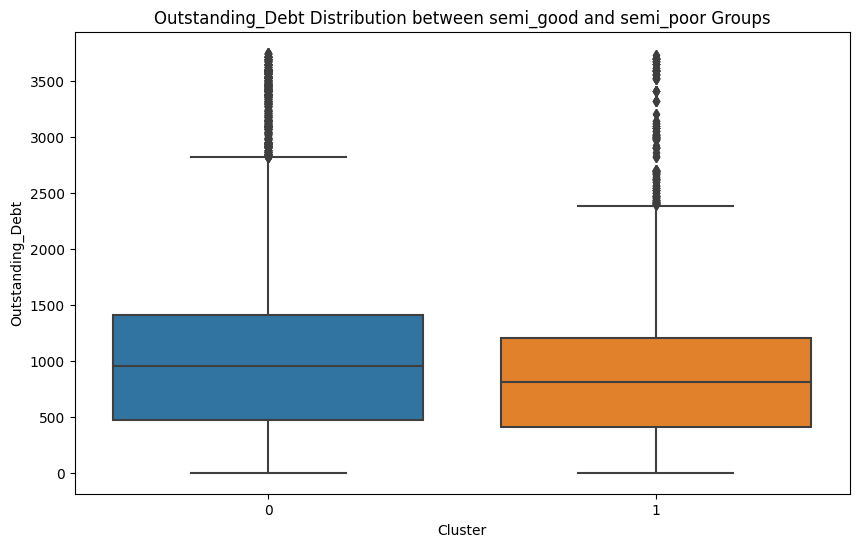

Variable: Outstanding_Debt
T-statistic: -25.1558
P-value: 0.00000
Result: Reject the null hypothesis (significant difference)



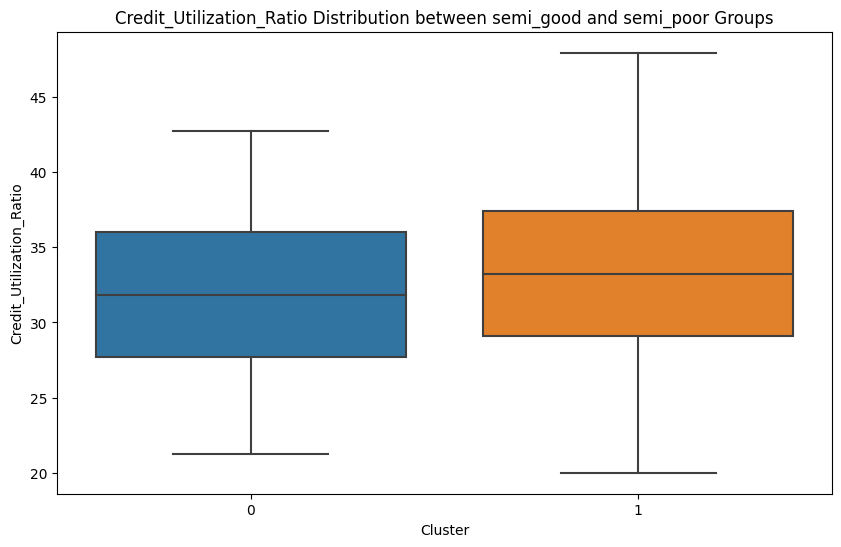

Variable: Credit_Utilization_Ratio
T-statistic: 22.8139
P-value: 0.00000
Result: Reject the null hypothesis (significant difference)



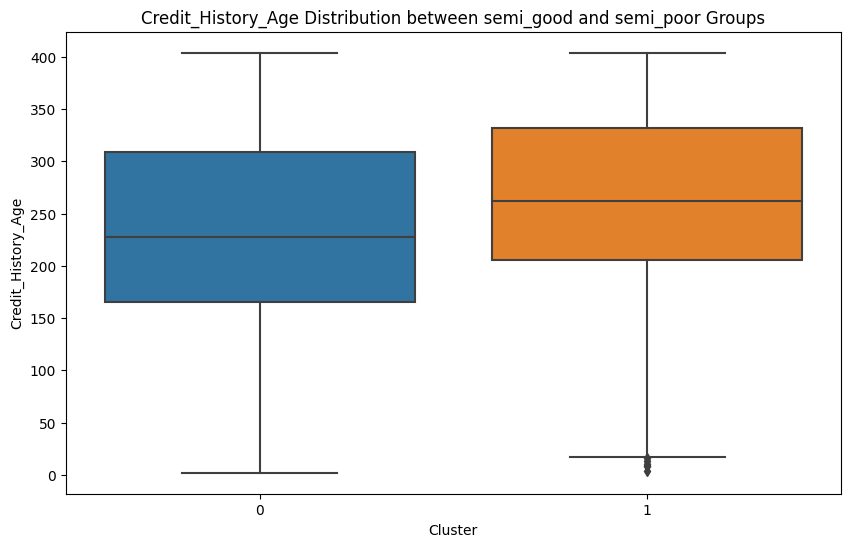

Variable: Credit_History_Age
T-statistic: 26.0570
P-value: 0.00000
Result: Reject the null hypothesis (significant difference)



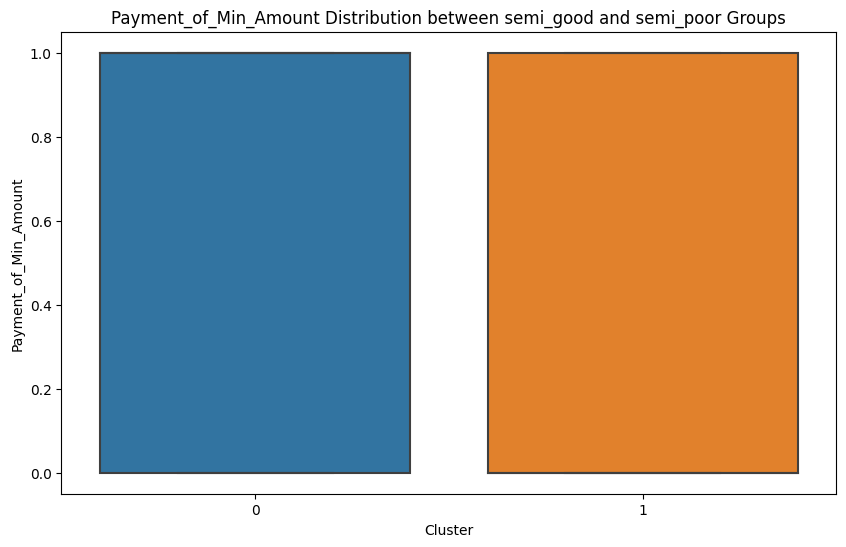

Variable: Payment_of_Min_Amount
T-statistic: -17.6358
P-value: 0.00000
Result: Reject the null hypothesis (significant difference)



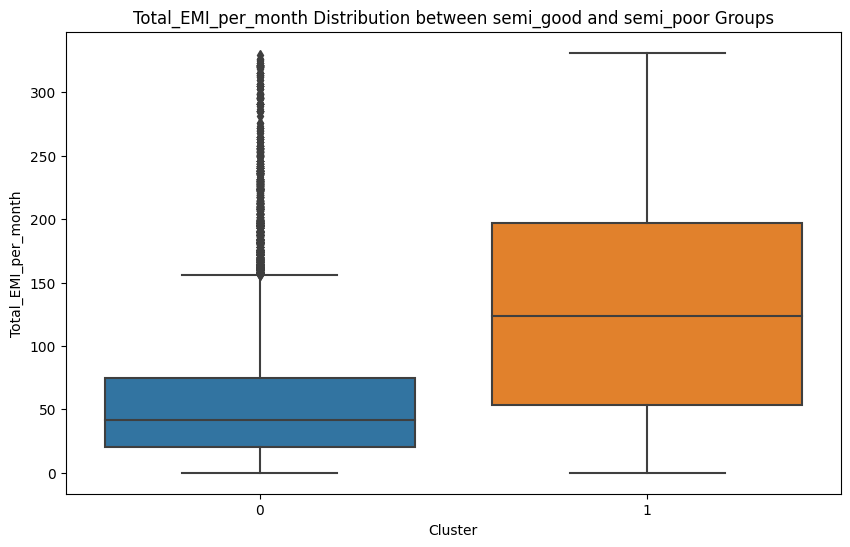

Variable: Total_EMI_per_month
T-statistic: 82.8441
P-value: 0.00000
Result: Reject the null hypothesis (significant difference)



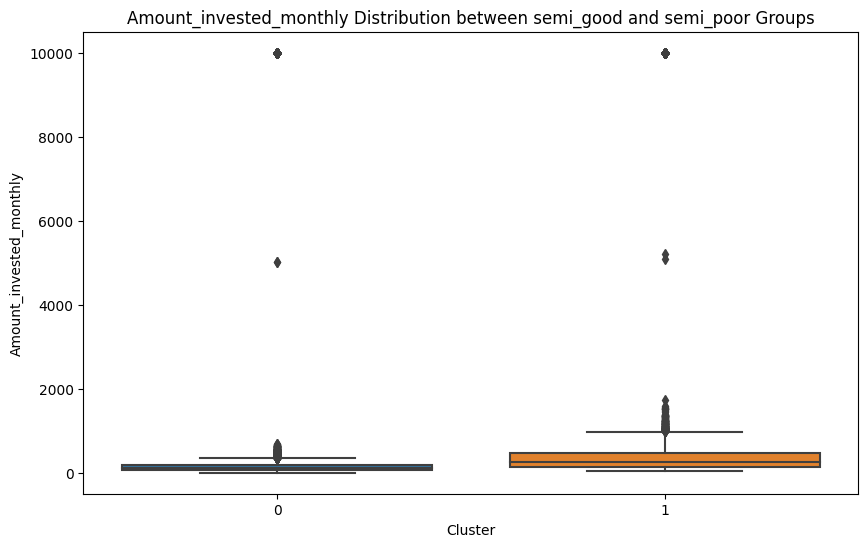

Variable: Amount_invested_monthly
T-statistic: 8.1402
P-value: 0.00000
Result: Reject the null hypothesis (significant difference)



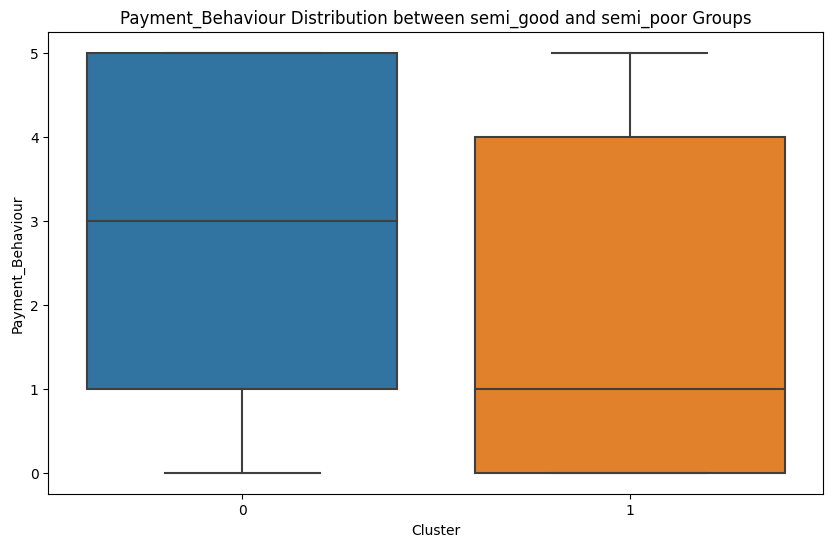

Variable: Payment_Behaviour
T-statistic: -46.1041
P-value: 0.00000
Result: Reject the null hypothesis (significant difference)



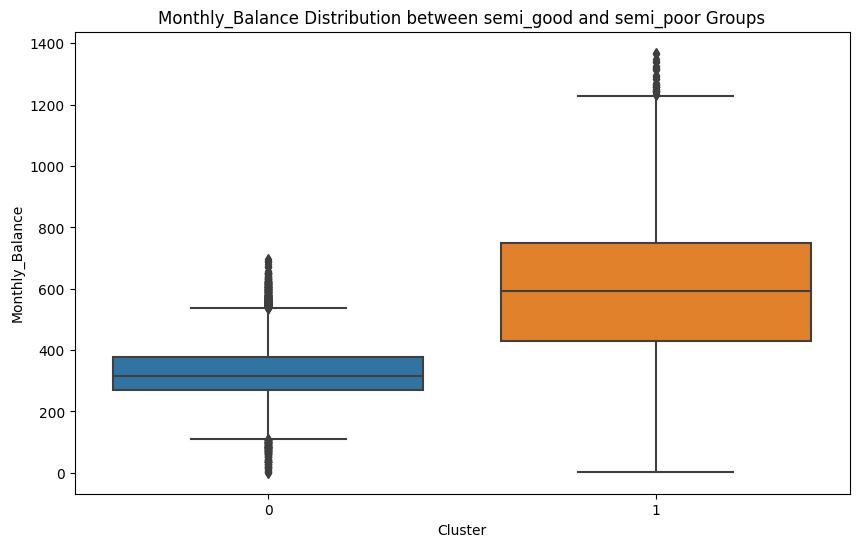

Variable: Monthly_Balance
T-statistic: 130.0707
P-value: 0.00000
Result: Reject the null hypothesis (significant difference)



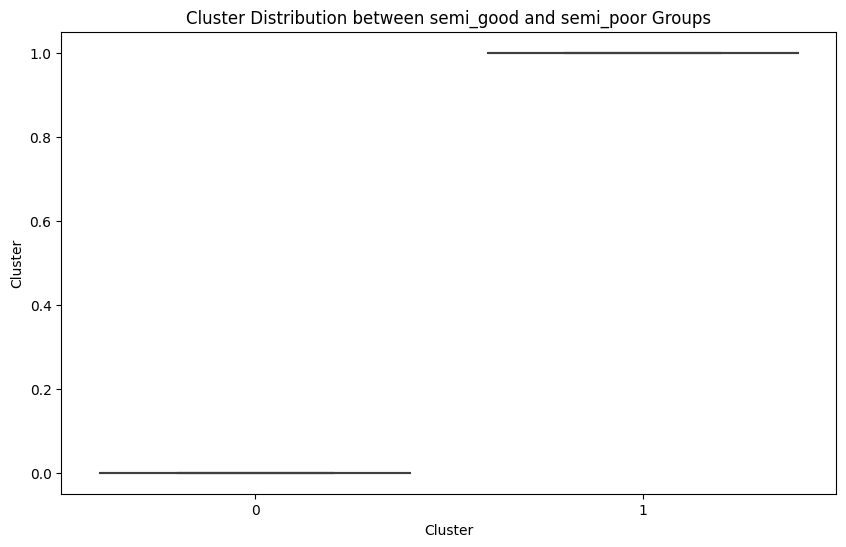

Variable: Cluster
T-statistic: inf
P-value: 0.00000
Result: Reject the null hypothesis (significant difference)



Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load your data
# semi_good_train = ...
# semi_poor_train = ...

# List of variables you want to analyze
variables_to_analyze = semi_good_train.columns

# Loop through each variable
for selected_variable in variables_to_analyze:
    # Visualization
    plt.figure(figsize=(10, 6))
    #sns.boxplot(x='Cluster', y=selected_variable, data=pd.concat([semi_good_train[[selected_variable, 'Cluster']], semi_poor_train[[selected_variable, 'Cluster']]]))
    sns.boxplot(x='Cluster', y=selected_variable, data=standard)
    plt.title(f'{selected_variable} Distribution between semi_good and semi_poor Groups')
    plt.show()

    # Statistical Analysis
    semi_good_values = semi_good_train[selected_variable]
    semi_poor_values = semi_poor_train[selected_variable]

    t_statistic, p_value = ttest_ind(semi_good_values, semi_poor_values, equal_var=True)
    alpha = 0.05

    print(f"Variable: {selected_variable}")
    print(f"T-statistic: {t_statistic:.4f}")
    print(f"P-value: {p_value:.5f}")

    if p_value < alpha:
        print("Result: Reject the null hypothesis (significant difference)")
    else:
        print("Result: Fail to reject the null hypothesis (no significant difference)")
    print()